# Lanchester Distance vs Outcome

Scenario: zerglings vs 5 marines.
Each army is spawned at a single point (no intra-army separation).
Only the distance between army points changes.
The ling count is varied and shown as separate curves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from phantom.micro.simulator import (
    ModelCombatSetup,
    NumpyLanchesterSimulator,
    SimulationUnit,
)


class StubParameters:
    time_distribution_lambda = 1.0
    lancester_dimension = 1.5
    enemy_range_bonus = 1.0


def make_lings(num_units: int, position: tuple[float, float], start_tag: int = 1) -> list[SimulationUnit]:
    return [
        SimulationUnit(
            tag=start_tag + i,
            is_enemy=False,
            is_flying=False,
            health=35,
            shield=0,
            ground_dps=10.0,
            air_dps=0.0,
            ground_range=0.1,
            air_range=0.0,
            radius=0.35,
            real_speed=4.13,
            position=position,
            attackable=True,
        )
        for i in range(num_units)
    ]


def make_marines(num_units: int, position: tuple[float, float], start_tag: int = 10000) -> list[SimulationUnit]:
    return [
        SimulationUnit(
            tag=start_tag + i,
            is_enemy=True,
            is_flying=False,
            health=45,
            shield=0,
            ground_dps=9.8,
            air_dps=9.8,
            ground_range=5.0,
            air_range=5.0,
            radius=0.375,
            real_speed=3.15,
            position=position,
            attackable=True,
        )
        for i in range(num_units)
    ]


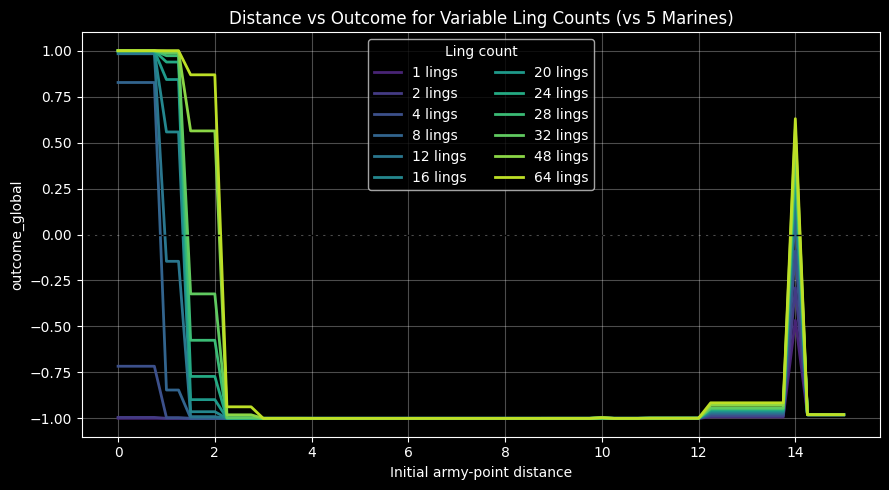

In [4]:
sim = NumpyLanchesterSimulator(StubParameters())

marine_count = 5
ling_counts = [1, 2, 4, 8, 12, 16, 20, 24, 28, 32, 48, 64]
distances = np.linspace(0.0, 15.0, 61)

plt.figure(figsize=(9, 5))
colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(ling_counts)))

for ling_count, color in zip(ling_counts, colors, strict=True):
    outcomes = []
    for d in distances:
        lings = make_lings(ling_count, position=(0.0, 0.0))
        marines = make_marines(marine_count, position=(float(d), 0.0))
        attacking = {u.tag for u in [*lings, *marines]}
        result = sim.simulate(ModelCombatSetup(units1=lings, units2=marines, attacking=attacking))
        outcomes.append(result.outcome_global)

    plt.plot(distances, outcomes, color=color, linewidth=2, label=f"{ling_count} lings")

plt.axhline(0.0, color="black", linewidth=1, linestyle="--")
plt.title("Distance vs Outcome for Variable Ling Counts (vs 5 Marines)")
plt.xlabel("Initial army-point distance")
plt.ylabel("outcome_global")
plt.grid(True, alpha=0.3)
plt.legend(title="Ling count", ncols=2)
plt.tight_layout()
plt.show()
